In [37]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.metrics as metrics 
import pickle
!pip install xgboost

In [38]:
loaded_df=pd.read_pickle("df.pkl")
df=loaded_df 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  int64  
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  float64
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  float64
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  a             12970 non-null  object 
 14  b             12970 non-null  object 
 15  c             12970 non-null  object 
 16  Transported   8693 non-null   object 
dtypes: float64(8), int64(1), object(8)
memory usage: 1.8+ MB


In [40]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
0,1301,Earth,1.0,G3S,TRAPPIST,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,NaN
1,1801,Earth,0.0,F4S,TRAPPIST,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,NaN
2,1901,Europa,1.0,C0S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,NaN
3,2101,Europa,0.0,C1S,TRAPPIST,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,NaN
4,2301,Earth,0.0,F5S,TRAPPIST,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,927601,Europa,0.0,A98P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,A,98.0,P,False
12966,927801,Earth,1.0,G1499S,PSO,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,G,1499.0,S,False
12967,927901,Earth,0.0,G1500S,TRAPPIST,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,G,1500.0,S,True
12968,928001,Europa,0.0,E608S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,E,608.0,S,False


In [41]:
def classification(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res


In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

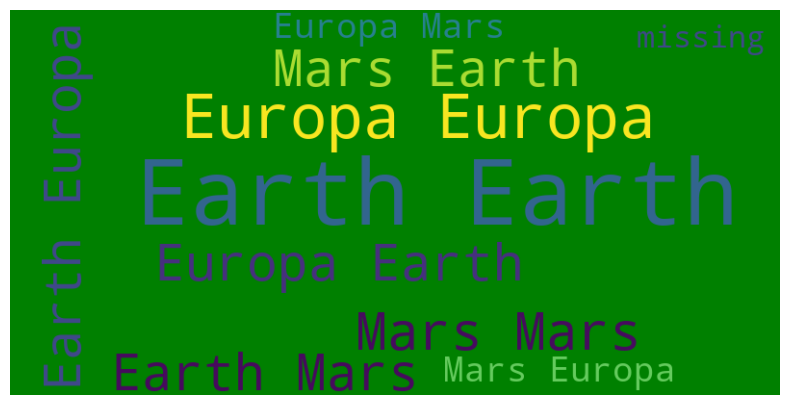

In [43]:
# Combine all 'HomePlanet' values into a single string
text = ' '.join(df['HomePlanet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

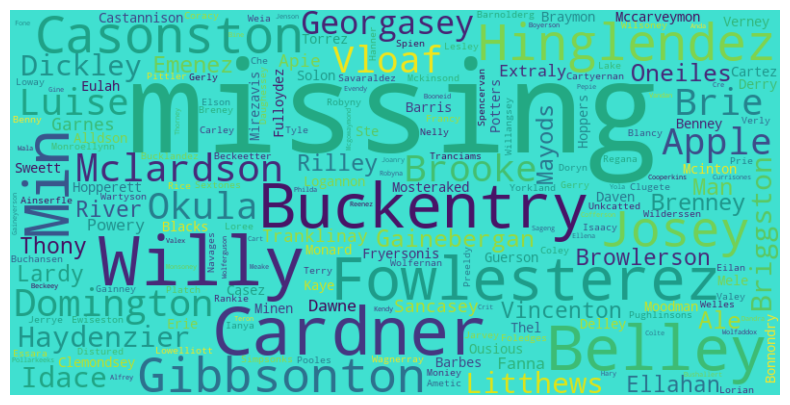

In [44]:
 #Combine all 'HomePlanet' values into a single string
text = ' '.join(df['Name'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='turquoise').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Country-Pictures

AttributeError: module 'matplotlib' has no attribute 'xlabel'

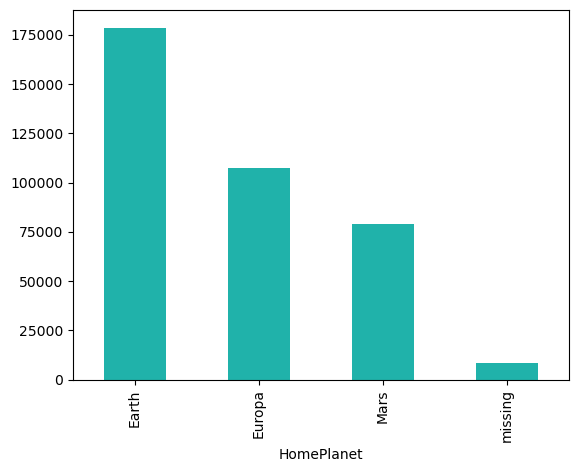

In [36]:
# Group by 'country' and sum the 'pictures' column
aggregated_data1 = df.groupby('HomePlanet')['Age'].sum()

# Create a bar plot
ax = aggregated_data1.plot(kind='bar', color='lightseagreen')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('HomePlanet')
plt.title('The ages of the passengers')

# Show the plot
plt.show()

In [9]:
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
a                  0
b                  0
c                  0
Transported     4277
dtype: int64

# Supervised Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [34]:
models_list = pd.DataFrame()